 # Progetto Laboratorio di Big data,Data Mining e Data Analytics - Strazzella Elia

## Fonti per il DataSet, Kaggle: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction/data

Progetto sviluppato con l'obiettivo di sviluppare un modello di machine learning in grado di prevedere il prezzo delle automobili utilizzando un dataset contenente informazioni dettagliate su vari aspetti delle vetture, come specifiche tecniche, caratteristiche estetiche e prestazioni.

### In questo progetto sono stati evidenziati i seguenti punti:
1. Caricamento dei dati
2. Pulizia preprocessing dei dati
3. Visualizzazioni grafiche dei dati
4. Creazione del modello mediante Linear Regression
5. Visualizzazioni finali della predicibilità

In [128]:
#Importazione librerie necessarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

## Caricamento dei dati

In [129]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [130]:
df.head()

,car_ID,CarName,fueltype,aspiration,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romero giulia,gas,std,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,alfa-romero stelvio,gas,std,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,alfa-romero Quadrifoglio,gas,std,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,audi 100 ls,gas,std,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,audi 100ls,gas,std,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   wheelbase         205 non-null    float64
 5   carlength         205 non-null    float64
 6   carwidth          205 non-null    float64
 7   carheight         205 non-null    float64
 8   curbweight        205 non-null    int64  
 9   enginetype        205 non-null    object 
 10  cylindernumber    205 non-null    object 
 11  enginesize        205 non-null    int64  
 12  boreratio         205 non-null    float64
 13  stroke            205 non-null    float64
 14  compressionratio  205 non-null    float64
 15  horsepower        205 non-null    int64  
 16  peakrpm           205 non-null    int64  
 1

Verifico se ho valori assenti 

In [132]:
df.isnull().sum()

car_ID              0
CarName             0
fueltype            0
aspiration          0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Verifico la presenza dei duplicati

In [133]:
df.duplicated().sum()

np.int64(0)

In [134]:
#Esposizione dei dati
df.describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Pulizia del dataset

In [135]:
#Colonne a eliminare dal mio dataset
columns_to_drop = ['car_ID', 'symboling', 'aspiration', 'doornumber', 'carbody', 
                   'drivewheel', 'enginelocation', 'fuelsystem', 'cylindernumber']

In [136]:
df.head()

,car_ID,CarName,fueltype,aspiration,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romero giulia,gas,std,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,alfa-romero stelvio,gas,std,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,alfa-romero Quadrifoglio,gas,std,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,audi 100 ls,gas,std,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,audi 100ls,gas,std,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [137]:
df['CarCompanyName'] = df['CarName'].apply(lambda x:x.split()[0])

In [138]:
#Riordinamento del dataset 
df.groupby('CarCompanyName')['CarCompanyName'].agg('count')

CarCompanyName
Nissan          1
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
mercury         1
mitsubishi     13
nissan         17
peugeot        11
plymouth        7
porcshce        1
porsche         4
renault         2
saab            6
subaru         12
toyota         31
toyouta         1
vokswagen       1
volkswagen      9
volvo          11
vw              2
Name: CarCompanyName, dtype: int64

## Esposizione dei grafici

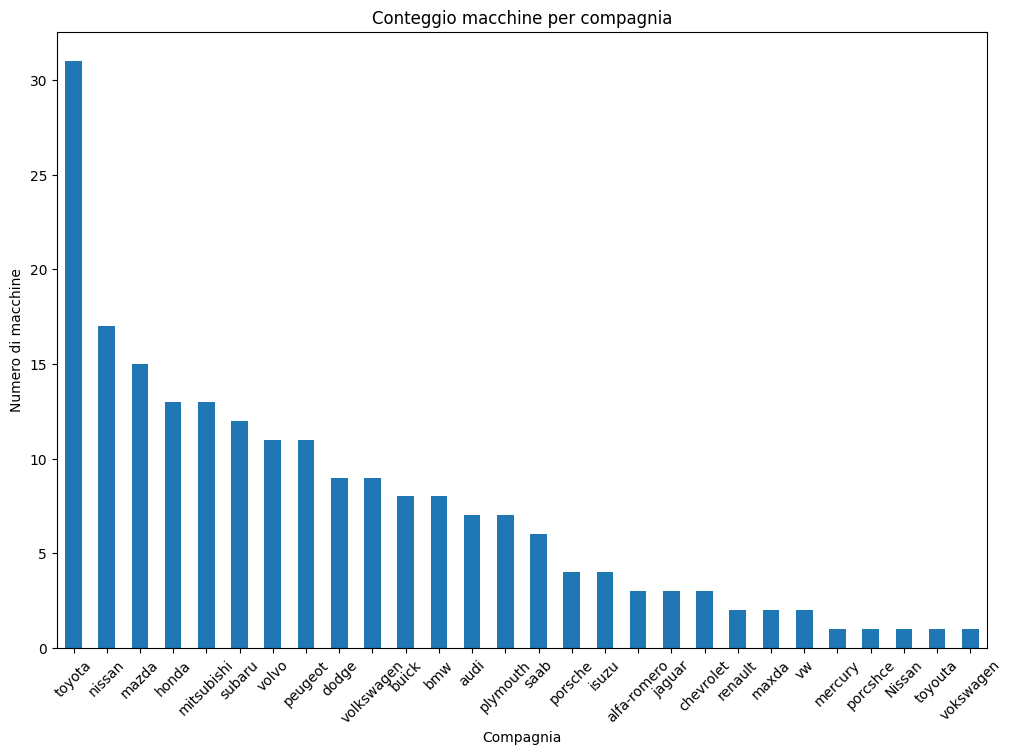

In [139]:
plt.figure(figsize=(12, 8))
df['CarCompanyName'] = df['CarCompanyName'].apply(lambda x: x.split(' ')[0])
df['CarCompanyName'].value_counts().plot(kind='bar')
plt.title('Conteggio macchine per compagnia')
plt.xlabel('Compagnia')
plt.ylabel('Numero di macchine')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='price', ylabel='Count'>

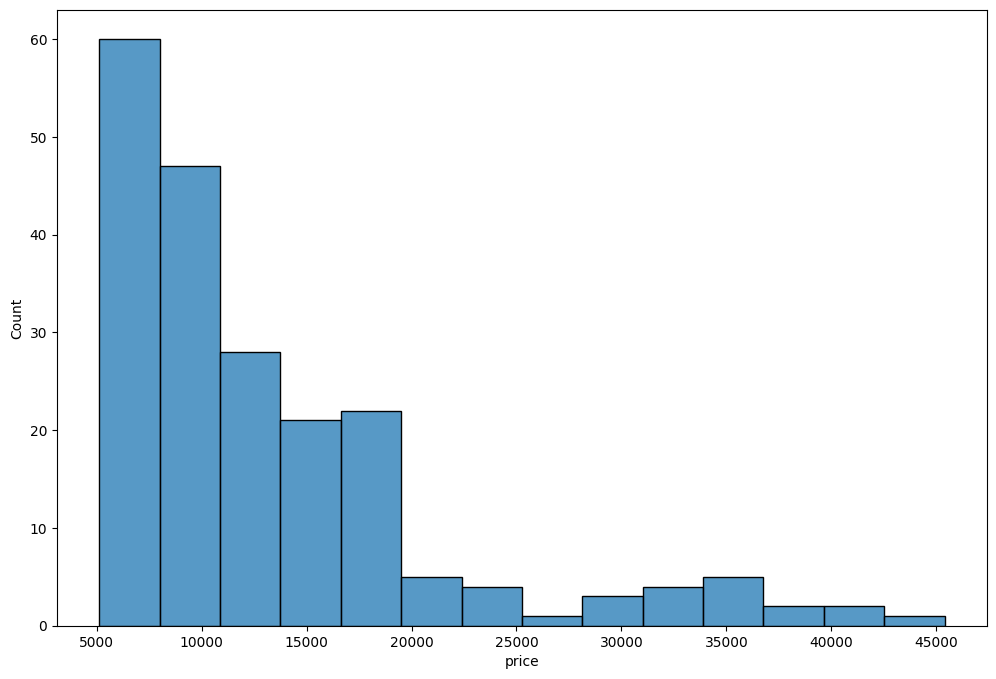

In [140]:
plt.figure(figsize=(12,8))
sns.histplot(df['price'])

In [141]:
#filtro solo le macchine che mi interessano(Per quantità)
filtered_df = df[df['CarCompanyName'].isin(['toyota', 'nissan','mazda','honda','mitsubishi'])]

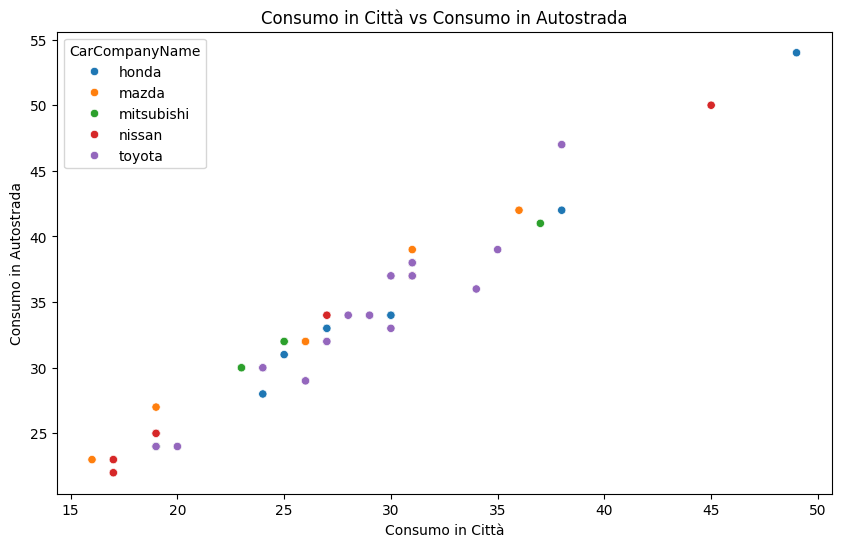

In [142]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='citympg', y='highwaympg', hue='CarCompanyName')
plt.title('Consumo in Città vs Consumo in Autostrada')
plt.xlabel('Consumo in Città')
plt.ylabel('Consumo in Autostrada')
plt.show()

In [143]:
#conteggio della variabile carburante
fuel_counts = df['fueltype'].value_counts()
df.fueltype.value_counts()  

fueltype
gas       185
diesel     20
Name: count, dtype: int64

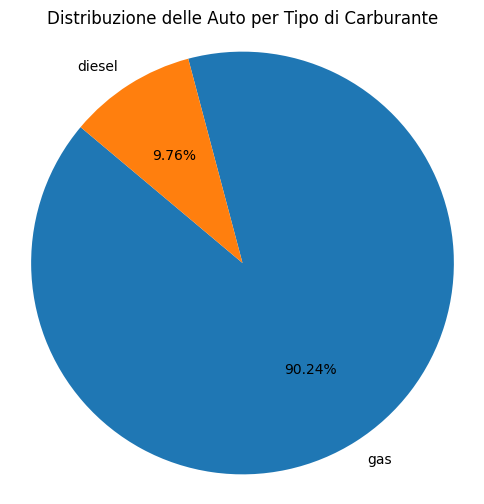

In [144]:
plt.figure(figsize=(6, 6))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.2f%%', startangle=140)
plt.title('Distribuzione delle Auto per Tipo di Carburante')
plt.axis('equal')  
plt.show()

Trasformazione dei dati in variabili numeriche

In [145]:
for column in df.select_dtypes(include=['object']).columns:
    label_mapping = {value: key for key, value in enumerate(df[column].unique())}
    df[column] = df[column].map(label_mapping)

In [146]:
df.head()

,car_ID,CarName,fueltype,aspiration,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompanyName
0,1,0,0,0,88.6,168.8,64.1,48.8,2548,0,...,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,2,1,0,0,88.6,168.8,64.1,48.8,2548,0,...,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,3,2,0,0,94.5,171.2,65.5,52.4,2823,1,...,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0
3,4,3,0,0,99.8,176.6,66.2,54.3,2337,2,...,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,5,4,0,0,99.4,176.6,66.4,54.3,2824,2,...,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1


In [147]:
correlation_matrix = df.corr()

In [148]:
df_half = df.sample(frac=0.5, random_state=2)

In [149]:
selected_columns = ['wheelbase', 'carlength', 'fueltype', 'curbweight', 'enginesize', 'horsepower', 'price']
df_selected = df_half[selected_columns]

array([[<Axes: xlabel='wheelbase', ylabel='wheelbase'>,
        <Axes: xlabel='carlength', ylabel='wheelbase'>,
        <Axes: xlabel='fueltype', ylabel='wheelbase'>,
        <Axes: xlabel='curbweight', ylabel='wheelbase'>,
        <Axes: xlabel='enginesize', ylabel='wheelbase'>,
        <Axes: xlabel='horsepower', ylabel='wheelbase'>,
        <Axes: xlabel='price', ylabel='wheelbase'>],
       [<Axes: xlabel='wheelbase', ylabel='carlength'>,
        <Axes: xlabel='carlength', ylabel='carlength'>,
        <Axes: xlabel='fueltype', ylabel='carlength'>,
        <Axes: xlabel='curbweight', ylabel='carlength'>,
        <Axes: xlabel='enginesize', ylabel='carlength'>,
        <Axes: xlabel='horsepower', ylabel='carlength'>,
        <Axes: xlabel='price', ylabel='carlength'>],
       [<Axes: xlabel='wheelbase', ylabel='fueltype'>,
        <Axes: xlabel='carlength', ylabel='fueltype'>,
        <Axes: xlabel='fueltype', ylabel='fueltype'>,
        <Axes: xlabel='curbweight', ylabel='fueltype'>

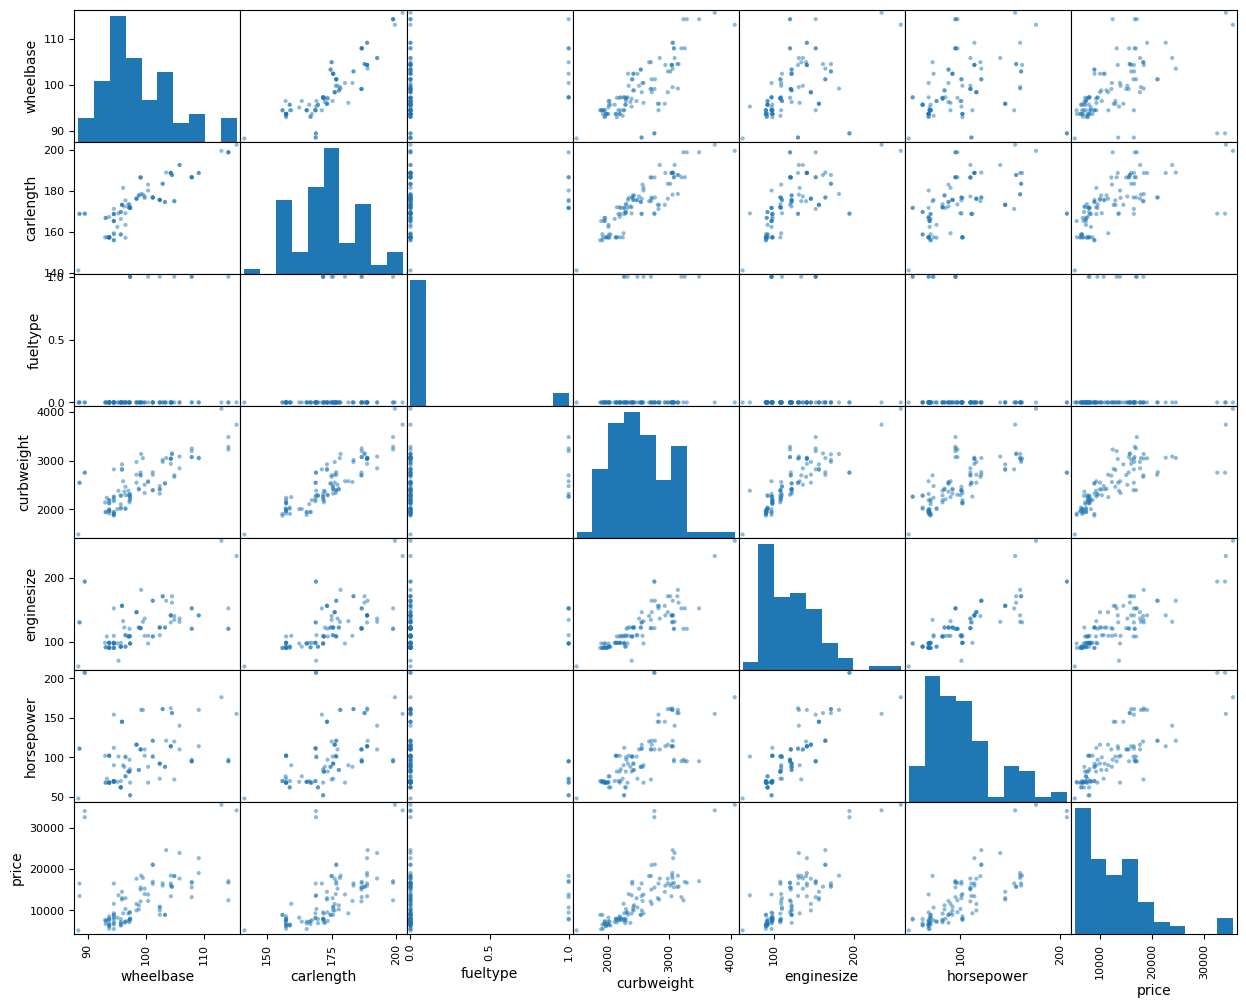

In [150]:
scatter_matrix(df_selected,alpha=0.5, figsize=(15, 12))

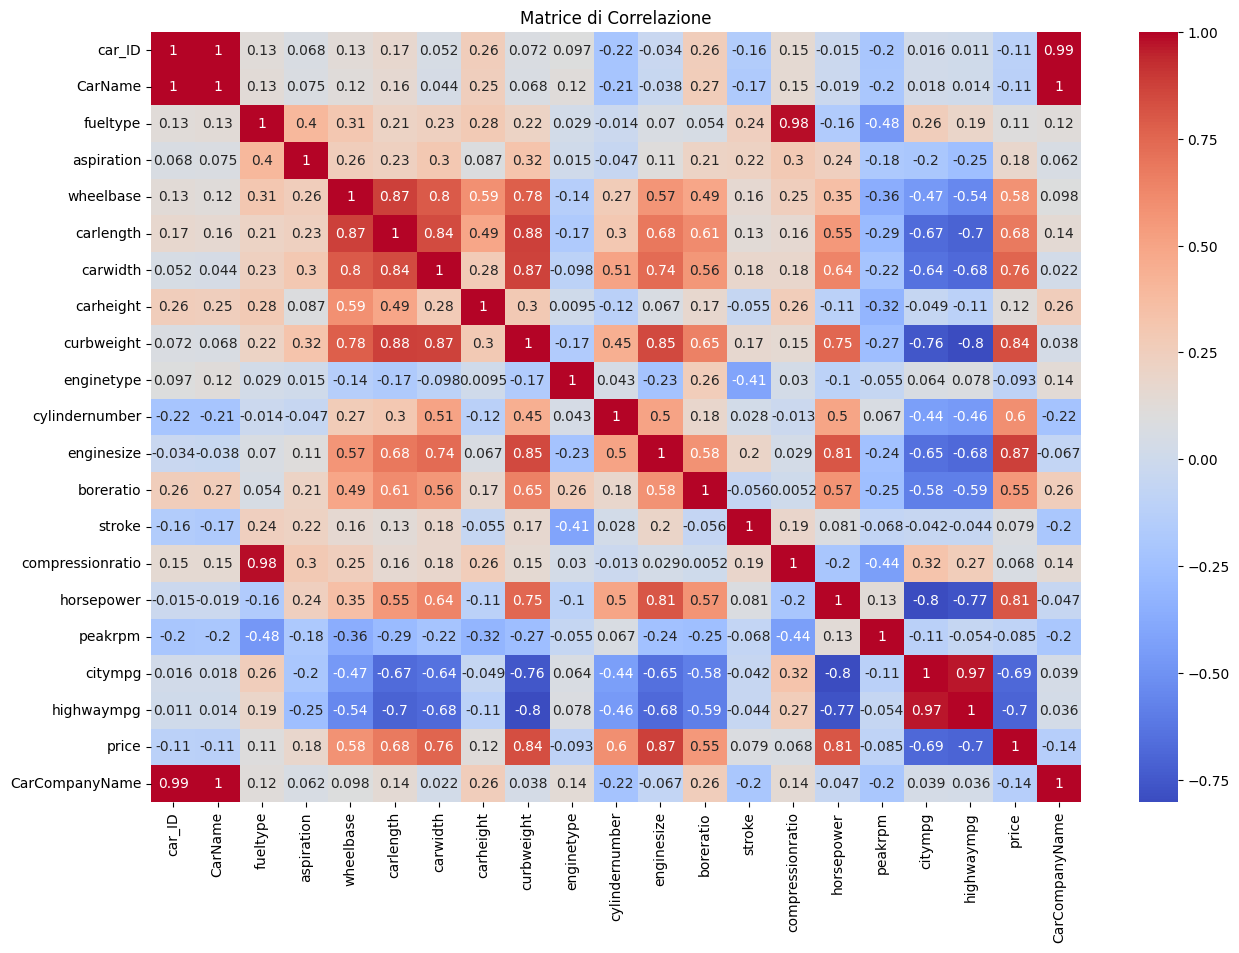

In [151]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice di Correlazione')
plt.show()

In [152]:
#visualizzo la correlazione con il prezzo
df.corr()['price'].sort_values(ascending=False)[1:]

enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
cylindernumber      0.595733
wheelbase           0.577816
boreratio           0.553173
aspiration          0.177926
carheight           0.119336
fueltype            0.105679
stroke              0.079443
compressionratio    0.067984
peakrpm            -0.085267
enginetype         -0.092841
car_ID             -0.109093
CarName            -0.114268
CarCompanyName     -0.137812
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

In [153]:
df.columns

Index(['car_ID', 'CarName', 'fueltype', 'aspiration', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'CarCompanyName'],
      dtype='object')

In [154]:
features = ['enginesize', 'horsepower','fueltype' ,'citympg', 'highwaympg','carheight','carlength','CarName']
X = df[features]
y = df['price']

In [155]:
df.tail()

,car_ID,CarName,fueltype,aspiration,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompanyName
200,201,140,0,0,109.1,188.8,68.9,55.5,2952,2,...,141,3.78,3.15,9.5,114,5400,23,28,16845.0,27
201,202,141,0,1,109.1,188.8,68.8,55.5,3049,2,...,141,3.78,3.15,8.7,160,5300,19,25,19045.0,27
202,203,142,0,0,109.1,188.8,68.9,55.5,3012,1,...,173,3.58,2.87,8.8,134,5500,18,23,21485.0,27
203,204,146,1,1,109.1,188.8,68.9,55.5,3217,2,...,145,3.01,3.40,23.0,106,4800,26,27,22470.0,27
204,205,144,0,1,109.1,188.8,68.9,55.5,3062,2,...,141,3.78,3.15,9.5,114,5400,19,25,22625.0,27


## Creazione del modello

In [156]:
#inizio ad allenare il dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [158]:
y_pred = model.predict(X_test)

In [159]:
df.head()

,car_ID,CarName,fueltype,aspiration,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompanyName
0,1,0,0,0,88.6,168.8,64.1,48.8,2548,0,...,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,2,1,0,0,88.6,168.8,64.1,48.8,2548,0,...,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,3,2,0,0,94.5,171.2,65.5,52.4,2823,1,...,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0
3,4,3,0,0,99.8,176.6,66.2,54.3,2337,2,...,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,5,4,0,0,99.4,176.6,66.4,54.3,2824,2,...,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1


## Visualizzazioni Finali sulla predicibilità

In [160]:
#predizione del prezzo dell'auto della prima riga
model.predict(X_test.iloc[0:1, :])

array([29295.86780397])

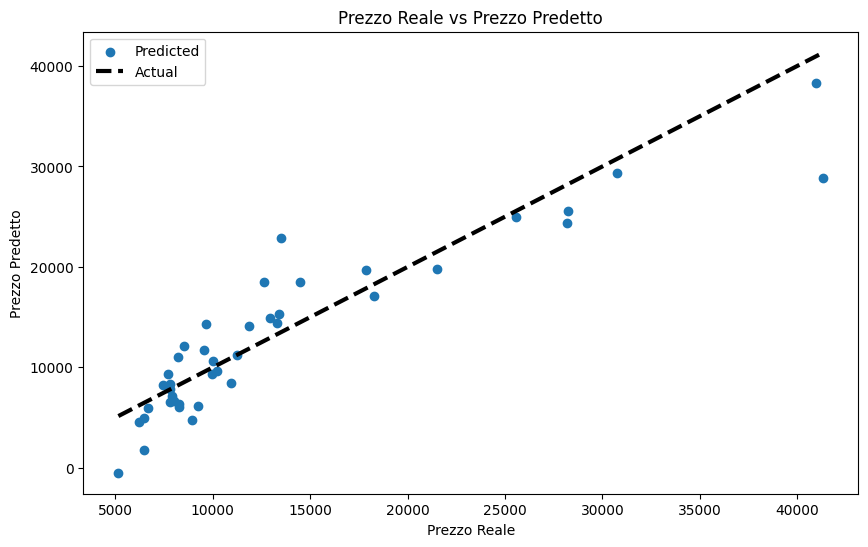

In [161]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Actual')
plt.xlabel('Prezzo Reale')
plt.ylabel('Prezzo Predetto')
plt.title('Prezzo Reale vs Prezzo Predetto')
plt.legend()
plt.show()

In [162]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 12231067.98108305
R-squared: 0.8450665693893639


In [163]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(y,X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     125.8
Date:                Sat, 11 Jan 2025   Prob (F-statistic):           6.28e-73
Time:                        10:55:10   Log-Likelihood:                -1946.6
No. Observations:                 205   AIC:                             3911.
Df Residuals:                     196   BIC:                             3941.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.566e+04   8091.457     -3.171      0.002   -4.16e+04   -9698.491
enginesize    90.2102     11.815      7.635      0.000      66.908     113.512
horsepower    73.7290     14.021      5.258      0.000      46.077     101.381
fueltype    3481.2500    961.031      3.622      0.000    1585.960    5376.540
citympg     -116.1863    176.141     -0.660      0.510    -463.561     231.188
highwaympg    31.5691    153.736      0.205      0.838    -271.619     334.757
carheight    301.2020    130.595      2.306      0.022      43.651     558.753
carlength     41.8984     41.113      1.019      0.309     -39.182     122.978
CarName      -26.7731      5.900     -4.537      0.000     -38.410     -15.137
==============================================================================
Omnibus:                       13.041   Durbin-Watson:                   0.978
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               23.922
Skew:                           0.305   Prob(JB):                     6.39e-06
Kurtosis:                       4.559   Cond. No.                     9.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""